<a href="https://colab.research.google.com/github/mlacasa/ProcessMining/blob/main/pm4py_inicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUTORIAL PM4PY

BASADO EN LA WEB Y DOCUMENTACIÓN

https://pm4py.fit.fraunhofer.de/static/assets/api/2.3.0/getting_started.html#understanding-process-mining

In [3]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.9 MB/s 
     |████████████████████████████████| 748 kB 54.0 MB/s 
     |████████████████████████████████| 40 kB 4.5 MB/s 
     |████████████████████████████████| 1.6 MB 45.3 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=2f731e540d7a6f0e740a5cf12991534a6d7fff3f0ffcd990cdaee80174ce0f03
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
  Created wheel for stringdist: filename=StringDist-1.0.9-cp38-cp38-linux_x86_64.whl size=24198 sha256=da6380f6632de73146d9f9a1420128b3549d365443ae8a551a371bb2ed0653d1
  Stored in directory: /root/.cache/pip/wheels/7a/64/e2/16f6a25a62a78f951c1715adb24ba2271ae9d7872f42378c3a
Successfully built pyvis stringdist


In [5]:
import pm4py
import pandas as pd

## Importación de los 'event logs' desde un fichero csv

In [9]:
# Data set: https://pm4py.fit.fraunhofer.de/static/assets/data/getting_started/running-example.csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mineria Processos/running-example.csv', delimiter = ';')

In [10]:
df.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [11]:
# Número de registros (acciones)
df.shape

(42, 5)

In [12]:
# Número de eventos
len(df.case_id.unique())

6

In [13]:
# Qué actividades suelen ser las primeras?
# Convertimos df ->data para trabajar com pm4py
data = pm4py.format_dataframe(df, case_id = 'case_id', activity_key = 'activity', timestamp_key='timestamp')

<ipython-input-13-37c2ab740a9c>:3: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  data = pm4py.format_dataframe(df, case_id = 'case_id', activity_key = 'activity', timestamp_key='timestamp')


In [15]:
# Comparar, mirar los concept:name y los @@index y @@case_index
data.head()

,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,register request,2010-12-30 10:02:00+00:00,50,Pete,1,register request,2010-12-30 10:02:00+00:00,0,0
1,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,1,examine thoroughly,2010-12-31 09:06:00+00:00,1,0
2,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,1,check ticket,2011-01-05 14:12:00+00:00,2,0
3,1,decide,2011-01-06 10:18:00+00:00,200,Sara,1,decide,2011-01-06 10:18:00+00:00,3,0
4,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,1,reject request,2011-01-07 13:24:00+00:00,4,0


In [17]:
# Los nombres iniciales de cada evento
[x for x in df.case_id.unique()]

[3, 2, 1, 6, 5, 4]

In [18]:
# Se renombran (sea el nombre inicial que sea)
[x for x in data.case_id.unique()]

[1, 2, 3, 4, 5, 6]

In [19]:
start_activities = pm4py.get_start_activities(data)
end_activities = pm4py.get_end_activities(data)
print('actividad de inicio es, ', start_activities, ' y la actividad final es ', end_activities)

actividad de inicio es,  {'register request': 6}  y la actividad final es  {'reject request': 3, 'pay compensation': 3}


In [29]:
#Ejemplo de las acciones del primer evento de la dataset inicial.
[x for x in df[df['case_id'] == 3]['activity']]

['register request',
 'examine casually',
 'check ticket',
 'decide',
 'reinitiate request',
 'examine thoroughly',
 'check ticket',
 'decide',
 'pay compensation']

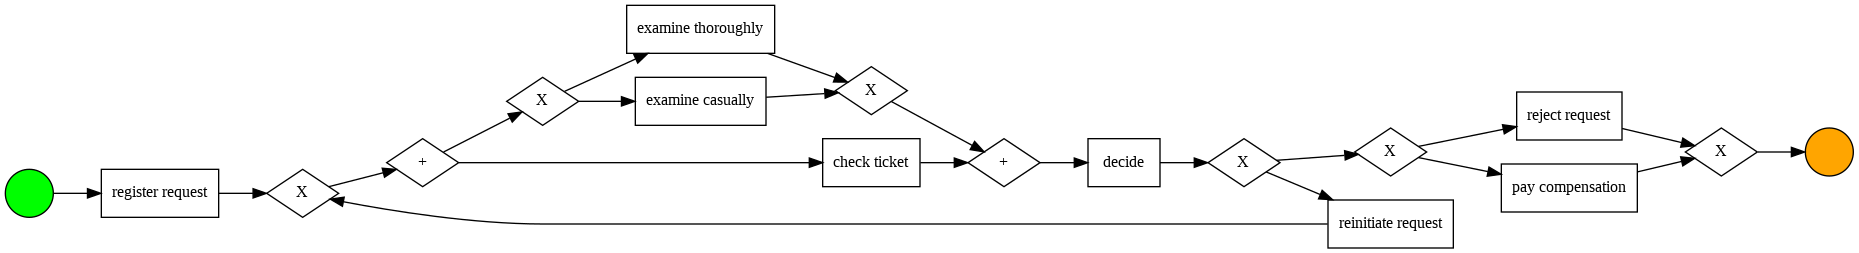

In [22]:
# Proceso inductivo de modelos en notación BPMN
# Ojo que se modifica el código vs el ejemplo, ya que se llama a discovery. Mirar API.
process_tree = pm4py.discovery.discover_process_tree_inductive(data)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

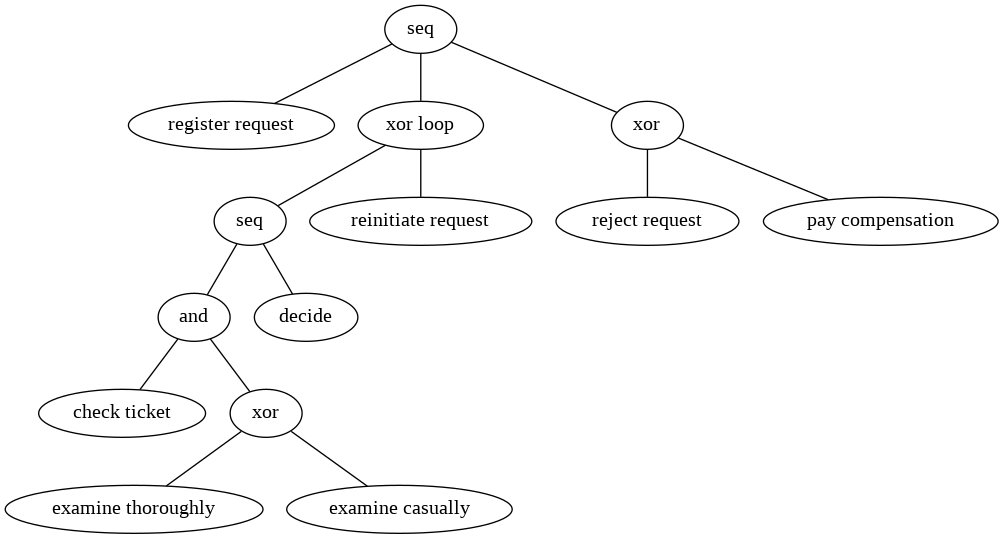

In [23]:
#Proceso mapeado como árbol de decisión
pm4py.view_process_tree(process_tree)

<ipython-input-24-23d3240e4362>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(data)


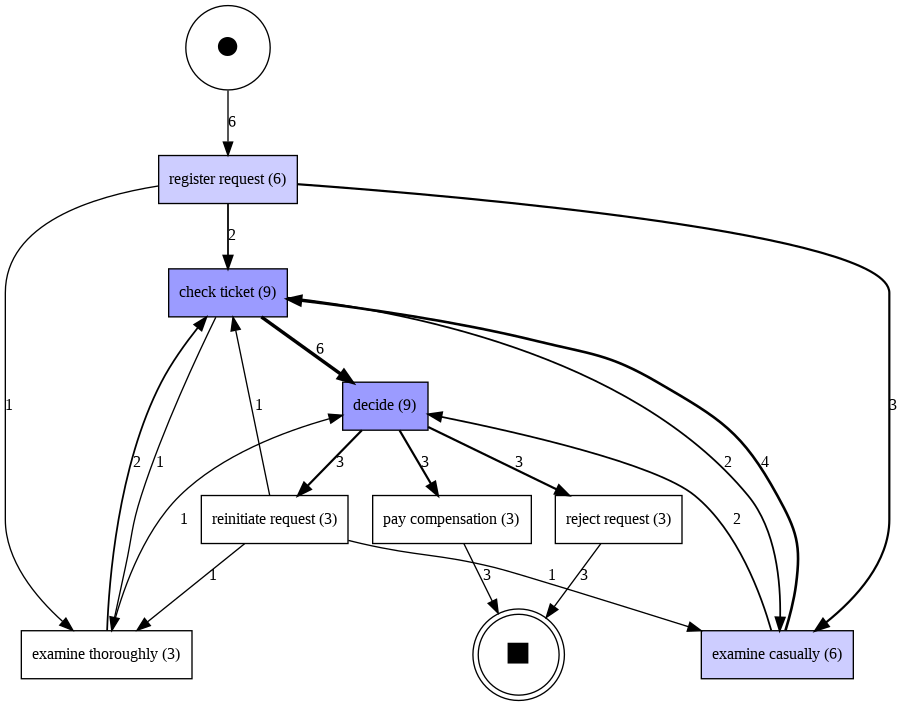

In [24]:
# Mapa de proceso DFG (Grafo dirigido)
# Suele implementarse en las app comerciales, se pueden consultar en: https://www.gartner.com/reviews/market/process-mining
dfg, start_activities, end_activities = pm4py.discover_dfg(data)
pm4py.view_dfg(dfg, start_activities, end_activities)

A. J. M. M. Weijters and J. T. S. Ribeiro, "Flexible Heuristics Miner (FHM)," 2011 IEEE Symposium on Computational Intelligence and Data Mining (CIDM), 2011, pp. 310-317, doi: 10.1109/CIDM.2011.5949453.

Modifica el 'alpha algorithm'

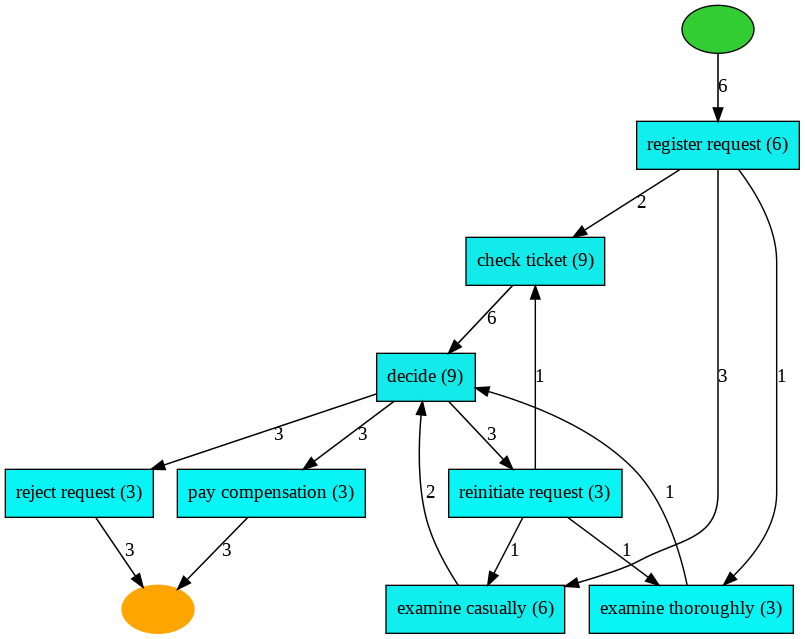

In [25]:
map = pm4py.discover_heuristics_net(data)
pm4py.view_heuristics_net(map)